# Titanic Dataset Cleaning

This notebook shows step-by-step cleaning of the Titanic dataset using Python and Pandas. The 
dataset is loaded from Seaborn.

# Dataset Loading

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## define dataset

In [90]:
titanic=sns.load_dataset('titanic')


In [91]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [92]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [93]:
titanic.shape

(891, 15)

In [94]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
titanic.columns.unique()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Check Missing Values

In [96]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Fill Missing Values of one by one

In [97]:
titanic['age']=titanic['age'].fillna(titanic['age'].median())
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [98]:
titanic['deck']=titanic['deck'].fillna(titanic['deck'].mode()[0])
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [99]:
titanic['embarked']=titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [111]:
titanic['embark_town']=titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
embark_town    0
alone          0
dtype: int64

In [112]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Southampton,True


# Check Duplicates

In [102]:
titanic.duplicated().sum()


np.int64(112)

### Remove duplicates

In [115]:
titanic=titanic.drop_duplicates().reset_index(drop=True)

In [116]:
titanic.duplicated().sum()

np.int64(0)

## Drop Irrelevant / Redundant Columns 

In [106]:
titanic=titanic.drop(columns=["alive", "class", "adult_male", "who", "deck"])


In [107]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Southampton,True


## Check for Outliers (Optional)

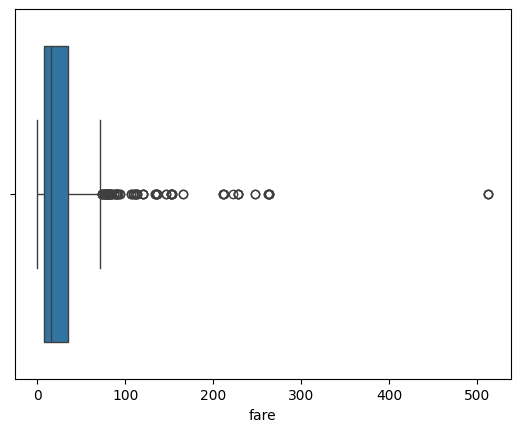

In [109]:
sns.boxplot(x=titanic["fare"])
plt.show()


## ✅ Titanic Dataset Cleaned


In [117]:
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        775 non-null    int64  
 1   survived     775 non-null    int64  
 2   pclass       775 non-null    int64  
 3   sex          775 non-null    object 
 4   age          775 non-null    float64
 5   sibsp        775 non-null    int64  
 6   parch        775 non-null    int64  
 7   fare         775 non-null    float64
 8   embarked     775 non-null    object 
 9   embark_town  775 non-null    object 
 10  alone        775 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 61.4+ KB


,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Southampton,False
1,1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,False
2,2,1,3,female,26.0,0,0,7.9250,S,Southampton,True
3,3,1,1,female,35.0,1,0,53.1000,S,Southampton,False
4,4,0,3,male,35.0,0,0,8.0500,S,Southampton,True


## Now the dataset is clean:
##### Missing values handled
##### Duplicates removed
##### Redundant columns dropped
##### Ready for analysis or machine learning